# Clustering

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import silhouette_score

# Run before importing KMeans

import os
os.environ["OMP_NUM_THREADS"] = '1'

In [2]:
# Reading the dataset
df = pd.read_csv('./data/default of credit card clients.csv')
df

,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29997,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29998,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29999,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
# Drop row one and Unnamed:0 column
df.drop(index=0, inplace=True)
df.drop(["Unnamed: 0"], inplace=True, axis=1)
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30000 non-null  object
 1   X2      30000 non-null  object
 2   X3      30000 non-null  object
 3   X4      30000 non-null  object
 4   X5      30000 non-null  object
 5   X6      30000 non-null  object
 6   X7      30000 non-null  object
 7   X8      30000 non-null  object
 8   X9      30000 non-null  object
 9   X10     30000 non-null  object
 10  X11     30000 non-null  object
 11  X12     30000 non-null  object
 12  X13     30000 non-null  object
 13  X14     30000 non-null  object
 14  X15     30000 non-null  object
 15  X16     30000 non-null  object
 16  X17     30000 non-null  object
 17  X18     30000 non-null  object
 18  X19     30000 non-null  object
 19  X20     30000 non-null  object
 20  X21     30000 non-null  object
 21  X22     30000 non-null  object
 22  X23     30000 non-null

In [5]:
df.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [6]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,...,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,81,2,7,4,56,11,11,11,11,10,...,21548,21010,20604,7943,7899,7518,6937,6897,6939,2
top,50000,2,2,2,29,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,3365,18112,14030,15964,1605,14737,15730,15764,16455,16947,...,3195,3506,4020,5249,5396,5968,6408,6703,7173,23364


### Data Cleaning

In [7]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder

# Convert the data types from object to int.
new_df = df.copy()
new_df = new_df.astype(int)
# Subtract one to reduce the gender value to 0 and 1
new_df["X2"] = new_df["X2"].apply(lambda x: x - 1)

categorical_cols = ["X3", "X4"]

# Applying one-hot encoding
hot_enc = OneHotEncoder()
encoded_data = hot_enc.fit_transform(new_df[categorical_cols])
new_df[hot_enc.get_feature_names_out(categorical_cols)] = encoded_data.toarray()
new_df.drop(columns=categorical_cols, inplace=True)

new_df.head()

,X1,X2,X5,X6,X7,X8,X9,X10,X11,X12,...,X3_1,X3_2,X3_3,X3_4,X3_5,X3_6,X4_0,X4_1,X4_2,X4_3
1,20000,1,24,2,2,-1,-1,-2,-2,3913,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,120000,1,26,-1,2,0,0,0,2,2682,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,90000,1,34,0,0,0,0,0,0,29239,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,50000,1,37,0,0,0,0,0,0,46990,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,50000,0,57,-1,0,-1,0,0,0,8617,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [8]:
# Apply variance threshold to remove low-variance features
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.25)
df_reduced = selector.fit_transform(new_df)
df_reduced = pd.DataFrame(df_reduced, columns=new_df.columns[selector.get_support(indices=True)])
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      30000 non-null  float64
 1   X5      30000 non-null  float64
 2   X6      30000 non-null  float64
 3   X7      30000 non-null  float64
 4   X8      30000 non-null  float64
 5   X9      30000 non-null  float64
 6   X10     30000 non-null  float64
 7   X11     30000 non-null  float64
 8   X12     30000 non-null  float64
 9   X13     30000 non-null  float64
 10  X14     30000 non-null  float64
 11  X15     30000 non-null  float64
 12  X16     30000 non-null  float64
 13  X17     30000 non-null  float64
 14  X18     30000 non-null  float64
 15  X19     30000 non-null  float64
 16  X20     30000 non-null  float64
 17  X21     30000 non-null  float64
 18  X22     30000 non-null  float64
 19  X23     30000 non-null  float64
dtypes: float64(20)
memory usage: 4.6 MB


In [9]:
from sklearn.preprocessing import StandardScaler

X = df_reduced.values
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
X

array([[-1.13672015, -1.24601985,  1.79456386, ..., -0.30806256,
        -0.31413612, -0.29338206],
       [-0.3659805 , -1.02904717, -0.87499115, ..., -0.24422965,
        -0.31413612, -0.18087821],
       [-0.59720239, -0.16115646,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.01212243],
       ...,
       [-1.05964618,  0.16430256,  3.57426721, ..., -0.03996431,
        -0.18322937, -0.11900109],
       [-0.67427636,  0.59824792,  0.90471219, ..., -0.18512036,
         3.15253642, -0.19190359],
       [-0.90549825,  1.14067961,  0.01486052, ..., -0.24422965,
        -0.24868274, -0.23713013]])

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca.explained_variance_ratio_

array([0.32691551, 0.20310814])

In [11]:
sum(pca.explained_variance_ratio_)

0.5300236455643388

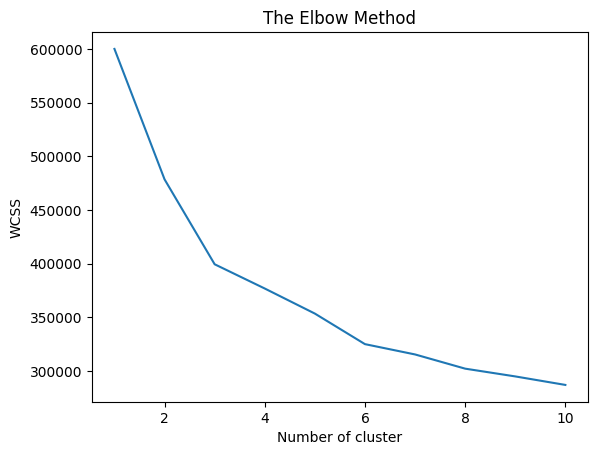

In [12]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of cluster')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Fitting K-means to the dataset
kmeans = KMeans(n_clusters = 3, init='k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

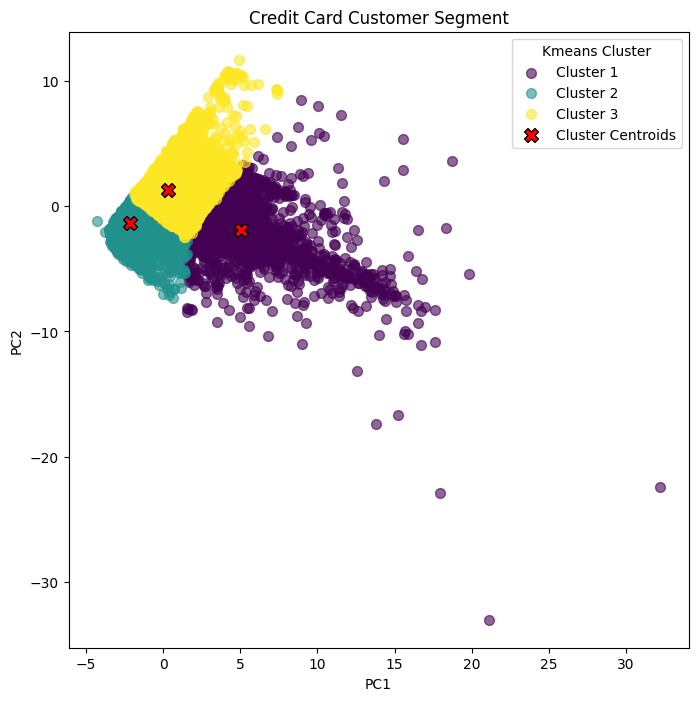

In [14]:
import matplotlib as mpl

df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Kmeans Cluster'] = kmeans.labels_
original_centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(original_centroids)
df_centroids = pd.DataFrame(centroids_pca, columns=['PC1', 'PC2'])

plt.figure(figsize=(8, 8))

# Get the unique cluster IDs
cluster_ids = sorted(df_pca['Kmeans Cluster'].unique())
# Define a colormap (like 'viridis')
cmap = mpl.colormaps['viridis'].resampled(len(cluster_ids))

# Loop through each cluster to plot and assign a label
for i, cluster_id in enumerate(cluster_ids):
    subset = df_pca[df_pca['Kmeans Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], color=cmap(i / len(cluster_ids)), marker='o',s=50, alpha=0.6, label=f'Cluster {i + 1}')

# Plot the centroids
plt.scatter(df_centroids['PC1'], df_centroids['PC2'], marker='X', s=100, color='red', edgecolors='black', label='Cluster Centroids')

plt.title("Credit Card Customer Segment")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Kmeans Cluster', loc='best') # Add the legend
plt.show()

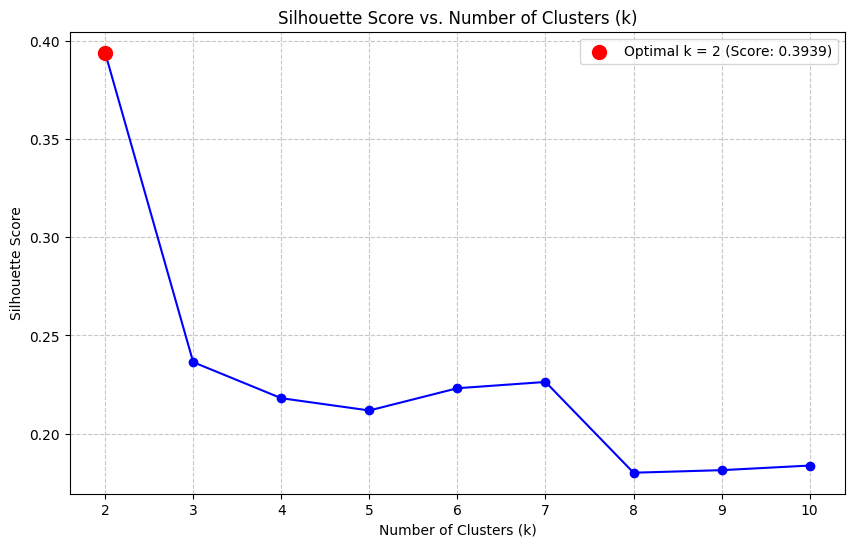

In [15]:
k_range = range(2, 11)
silhouette_scores = []
best_k = 0
best_score = -1
for k in k_range:
    # Initialize and fit K-Means model
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X)
    # Calculate the average Silhouette Score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)
    # Track the best k
    if score > best_score:
        best_score = score
        best_k = k
# Plot the Silhouette Score vs. Number of Clusters (k)
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.scatter(best_k, best_score, color='red', s=100, label=f'Optimal k = {best_k} (Score: {best_score:.4f})', zorder=5)
plt.title('Silhouette Score vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

## Hierarchical Clustering
Hierarchical clustering is also a distance-based clustering method. However, while K-
means clustering starts by assigning all data points to a cluster and then iteratively
updating the cluster centroids and cluster assignments, hierarchical clustering works
very differently. Agglomerative algorithm works from the ground up as follows:
- Step One: Each point starts as its own cluster
- Step Two: Find the closest pair of clusters and merge them
- Step Three: Repeat the previous step until there is only one cluster

Using this method, we can construct a tree, or dendrogram which shows the point at
which each cluster merges with another. This is therefore particularly useful in cases
where we’re not just interested in the clusters but in constructing a full dendrogram. For
example, one application is in evolutionary biology. We can look at the DNA sequences
for different species and use hierarchical clustering based on how similar the sequences
are to construct a phylogenetic tree, which is used to identify which species are most
closely related to one another from an evolutionary perspective.

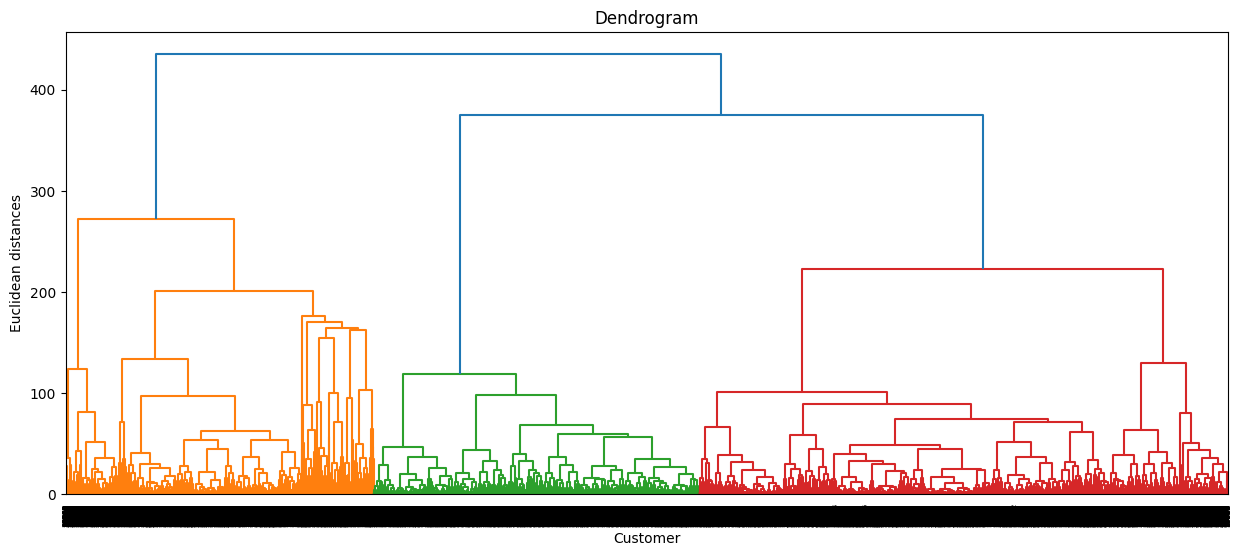

In [16]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15, 6))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customer')
plt.ylabel('Euclidean distances')
plt.show()

In [17]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, metric = "euclidean", linkage = "ward")
y_hc = hc.fit_predict(X)

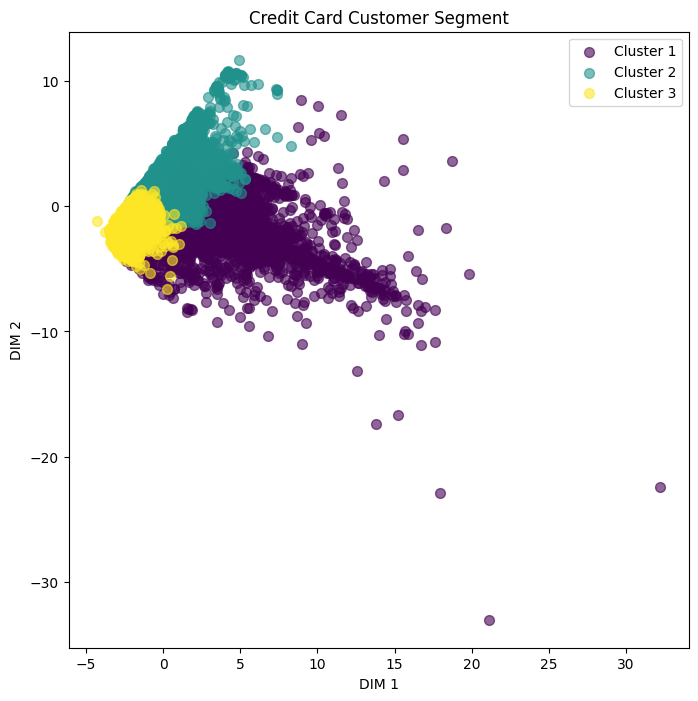

In [18]:
plt.figure(figsize=(8, 8))
df_pca['Hierachical Cluster'] = hc.labels_
# Get the unique cluster IDs
cluster_ids = sorted(df_pca['Hierachical Cluster'].unique())
# Define a colourmap (like 'viridis')
cmap = mpl.colormaps['viridis'].resampled(len(cluster_ids))
# Loop through each cluster to plot and assign a label
for i, cluster_id in enumerate(cluster_ids):
    subset = df_pca[df_pca['Hierachical Cluster'] == cluster_id]
    plt.scatter(subset['PC1'], subset['PC2'], color=cmap(i / len(cluster_ids)), marker='o',s=50, alpha=0.6, label=f'Cluster {i + 1}')
plt.title("Credit Card Customer Segment")
plt.xlabel("DIM 1")
plt.ylabel("DIM 2")
plt.legend()
plt.show()

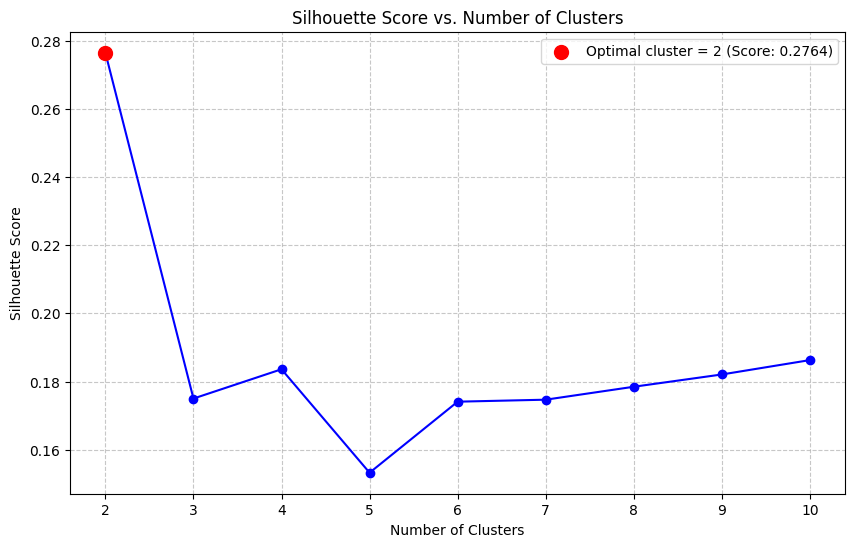

In [20]:
import numpy as np

cluster_range = range(2, 11)
silhouette_scores = []
best_cluster = 0
best_score = -1

for cluster in cluster_range:
    # Initialize and fit Agglomerative model
    hc = AgglomerativeClustering(n_clusters = cluster, metric = "euclidean", linkage = "ward")
    cluster_labels = hc.fit_predict(X)

    # Calculate the Silhouette Score
    score = silhouette_score(X, cluster_labels)
    silhouette_scores.append(score)

    # Track the best cluster range
    if score > best_score:
        best_score = score
        best_cluster = cluster

# Plot the Silhouette Score vs. Number of Clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.scatter(best_cluster, best_score, color='red', s=100, label=f'Optimal cluster = {best_cluster} (Score: {best_score:.4f})', zorder=5)

plt.title('Silhouette Score vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(k_range)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()